In [26]:
import polars.selectors as cs
import numpy as np

import polars as pl

import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib_inline.backend_inline

import matplotlib.pyplot as plt

LATEX = False
if LATEX:
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams["font.family"] = "serif"
    mpl.rcParams["font.serif"] = "Times"
else:
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams["font.family"] = "Times New Roman"
    mpl.rcParams["mathtext.fontset"] = "stix"
    
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['savefig.dpi'] = 300

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

mpl.rcParams['axes.titleweight'] = 'bold'

mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.frameon'] = False

In [27]:
index_cols = {
    1: ['l_returnflag', 'l_linestatus'],
    3: ['l_orderkey','o_orderdate','o_shippriority'],
    4: ['o_orderpriority'],
    5: ['n_name'],
    6: [],
    7: ['supp_nation', 'cust_nation', 'l_year'], 
    8: ['o_year'],
    9: ['nation', 'o_year'],
    10: ['c_custkey', 'c_name', 'c_acctbal', 'c_phone', 'n_name', 'c_address', 'c_comment'],
    12: ['l_shipmode'],
    13: ['c_count'],
    14: [],
    
    17: [],
    19: [],
    20: [],
    21: ['s_name'],
    22: ['cntrycode']
}
scale_required = set([4, 5, 6, 7, 9, 12, 13, 17, 19, 21, 22])

queries_to_run = [4]

In [28]:
def graph_query14(full_df):
    print("Q14!")
    fig, ax = plt.subplots(figsize=(7.5, 2.5))

    xs = [np.log2(x) for x in full_df['mi']]
    y = full_df['pct_diff_promo_revenue']
    print(y.to_list())
    ax.plot(xs, y.to_list(), linestyle='dotted', markersize=10, mew=1.5)

    ax.set_xlabel('Mutual Information (log scale)', fontsize=14)
    ax.set_ylabel(f'Relative Error (%)', fontsize=14)
    ax.set_title(f'Approximating Promo Revenue Percentage', fontsize=16)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('figs/q14_order_results.png')
    
def graph_query12(full_df):
    print("Q12")
    fig, axes = plt.subplots(2, 1, figsize=(7.5, 5), sharex=True)
    for ind, key in enumerate(['pct_diff_high_line_count', 'pct_diff_low_line_count']):
        names = ["High", "Low"]
        ax = axes[ind]

        priorities = full_df['l_shipmode'].unique().sort()

        for priority in priorities:
            group_data = full_df.filter(pl.col('l_shipmode') == priority).sort('mi')
            xs = [np.log2(x) for x in group_data['mi']]
            y = group_data[f'pct_diff_{names[ind].lower()}_line_count']
            ax.plot(xs, y.to_list(),linestyle='dotted', markersize=10, mew=1.5,
                label=f'Ship Mode: {priority}'
            )
            print('priority')
            print(y.to_list())

        ax.set_xlabel('Mutual Information (log scale)', fontsize=14)
        ax.set_ylabel(f'Relative Error (%)', fontsize=14)
        ax.set_title(f'Approximating {names[ind]} Line Count', fontsize=16)
        ax.legend(fontsize=14)
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
#         plt.savefig('figs/q12_order_results.png')

In [29]:
def graph_query4(full_df):

    print("Q4!")
    fig, ax = plt.subplots(figsize=(7.5, 2.5))
    priorities = full_df['o_orderpriority'].unique().sort()

    xs = [np.log2(x) for x in full_df['mi'].unique().sort().to_list()]
    for priority in priorities:
        group_data = full_df.filter(pl.col('o_orderpriority') == priority).sort('mi')

        y = group_data['pct_diff_order_count']
        ax.plot(xs, y.to_list(), linestyle='dotted',
            label=f'Priority: {priority}', linewidth=3
        )
        print(priority, y.to_list())

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlabel('Mutual Information (log scale)', fontsize=15)
    ax.set_ylabel(f'Relative \n Error (%)', fontsize=15)
    ax.set_title(f'Approximating Order Count Difference %', fontsize=18)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
#     plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)  # hspace controls vertical spacing
    plt.savefig('../figs/q4_order_results.png', bbox_inches='tight')

In [30]:
def graph_query(full_df, query_ind):
    if query_ind == 1:
        graph_query1(full_df)
    if query_ind == 14:
        graph_query14(full_df)
    if query_ind == 4:
        graph_query4(full_df)
    if query_ind == 12:
        graph_query12(full_df)

Q4!
1-URGENT [19.96512310029025, 14.05365759791759, 10.059984638658017, 7.358872376685366, 5.437855214909598, 4.322137854788359, 3.3695962421945516, 2.983568452346477, 2.81184143447327, 2.5271817786652835]
2-HIGH [20.124631262983975, 15.491090475574882, 10.773410398602977, 7.376415263356565, 5.865162364513817, 4.2313461470842615, 3.6678304804730795, 3.1603819135305886, 2.8894272417505356, 2.6485898880980785]
3-MEDIUM [20.467997670860406, 14.859702237615673, 10.480674100781746, 7.6185819419659175, 5.79207069584205, 4.429838984256729, 3.4489778417533317, 3.053061898295804, 2.7401711031930054, 2.798471564963294]
4-NOT SPECIFIED [19.977361754191808, 14.281198069625036, 9.821849587815292, 7.191054413518472, 5.43262550569972, 4.146200250581119, 3.4547762871475594, 2.986015689987773, 2.7631150414144603, 2.651404994383692]
5-LOW [19.652675679253626, 13.539044258290662, 9.961165301612782, 7.291384732732681, 5.393639246966123, 4.143513175915339, 3.4685230406770984, 3.0517145843627667, 2.68950164

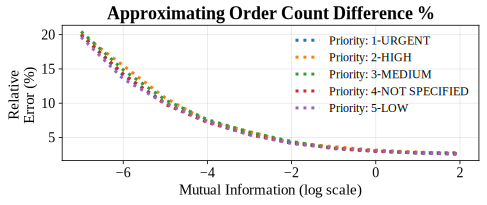

In [32]:
for priv_unit in ['orders']:
    for query_ind in [4]:
        full_df = pl.DataFrame()
        for mi in [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.0, 2.0, 4.0]:
            null_info = {}
            orig = pl.read_csv(f'../unnoised/q{query_ind}.csv')
            if query_ind == 22:
                orig = orig.select(
                pl.col("cntrycode").cast(str),
                pl.col("numcust"),
                pl.col("totacctbal"))
            if query_ind == 10:
                orig = orig.select(
                    pl.col("c_custkey"), pl.col("c_name"),
                    pl.col("c_acctbal").cast(str),
                    pl.col("n_name"), pl.col("c_address"), pl.col("c_phone"), pl.col("c_comment")
                )
            noised = pl.read_json(f'../outputs/ap-duckdb-q{query_ind}-{priv_unit}-{mi}-step3/output.json')
            if index_cols[query_ind]:
                merged_df = orig.join(noised, on=index_cols[query_ind], suffix='_noised')
            else:
                merged_df = orig.join(noised, suffix='_noised', how='cross')
            suffix1 = ''
            suffix2 = '_noised'
            cols_with_suffixes = [col for col in merged_df.columns if suffix1 in col or suffix2 in col]

            base_names = set([col.replace(suffix1, '').replace(suffix2, '') for col in cols_with_suffixes])
            for base_name in base_names:
                nulls_exist = False
                null_inds, null_vals = [], []

                orig = base_name + suffix1
                noised = base_name + suffix2
                if orig in merged_df.columns and noised in merged_df.columns:
                    rel_errors = []
                    for ind in range(len(merged_df[orig])):
                        if query_ind in scale_required:
                            const = 2 # subsampling scaling
                        else:
                            const = 1
        #                     print(merged_df[noised][ind])
                        new = np.average(
                            [100*abs(
                                const*merged_df[noised][ind][tmp_ind] - merged_df[orig][ind]
                                ) / merged_df[orig][ind] for tmp_ind in range(
                                    len(merged_df[noised][ind]))]
                        )
                        rel_errors.append(new)
                    merged_df = merged_df.with_columns(pl.Series('pct_diff_' + base_name, rel_errors))
                    merged_df = merged_df.with_columns(pl.Series('mi', [mi]*len(rel_errors)))
            full_df = pl.concat([full_df, merged_df])
        graph_query(full_df, query_ind)